# **PROJECT:** LIFE EXPECTANCY AND GDP

In this project, I'll explore and analyze `life expectancy` and `GDP` data from 2000-2015. 

**Project Scope:** 
1. The association between `Life expectancy` and `GDP`. Is it true that countries with higher `GDP` will also have higher `Life expectancy`?
2. How the countries has progressed when it comes to improving `Life expectancy` and `GDP`.

In [20]:
## Import essential libraries for data analysis and data visulization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import pearsonr, kendalltau
import statsmodels.api as sm

sns.set_style('whitegrid')
%matplotlib inline

## **Part 1: Explore the dataset**

In [2]:
## Import the dataset
df = pd.read_csv('all_data.csv')

In [3]:
## Preprocess data: Cleaning and Tidy Data
df.columns = ['country', 'year', 'life_expect', 'gdp']

## Check for null or duplicated values
print(df.isna().sum())
print(df.duplicated().sum())

## Convert `GDP` values to billions
df.gdp = df.apply(lambda row: (row.gdp/1000000000), axis=1)

## Change the US's name for better code later
df.country = df['country'].str.replace('United States of America', 'USA')

country        0
year           0
life_expect    0
gdp            0
dtype: int64
0


There're no missing or duplicated values in the dataset. 

In [4]:
## How many countries in the dataset
print(df.country.unique())

## Check dataset's basic statistics
display(HTML(df.describe().to_html()))

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


,year,life_expect,gdp
count,96.000000,96.000000,96.000000
mean,2007.500000,72.789583,3880.498571
std,4.633971,10.672882,5197.561311
min,2000.000000,44.300000,4.415703
25%,2003.750000,74.475000,173.301750
50%,2007.500000,76.750000,1280.220000
75%,2011.250000,78.900000,4067.510000
max,2015.000000,81.000000,18100.000000


Based on the summary of statistics above,

**Life Expectancy**
1. the `average life expectancy` is approximately 72.8 years, which is equal to the UN's estimate in 2019.
2. the `median life expectancy` is around 76.7 years, which is quite higher than the average. This indicates that the distribution of the life expectancy is probably left skewed. 
3. the `lowest life expectancy` is roughly 44.3 years, which is pretty low compared to the UN's estimate. 
4. the `highest life expectancy` is exacty 81 years.
5. the `IQR` of `life expectancy` set is [74.5, 78.9], which means 50% of the data falls into this range. 


**GDP**

1. the `average GDP` is approximately 3.8 trillion dollars.
2. the `median GDP` is roughly 1.3 trillion dollars, which is far lower than the average. This indicates that the distribution is left skewed.
3. the `lowest GDP` is only around 4.4 billion dollars and the `highest GDP` is around 18.1 trillion dollars, which is absolutely significantly different. 

## **Part 2: Visualize and analyze the dataset**

As stated above, the objective of this project is to see if there's any association between `Life expectancy` and `GDP` as well as to peek at the countries' progress over the period of time from 2000 to 2015.

### The Distribution of Life Expectancy and GDP

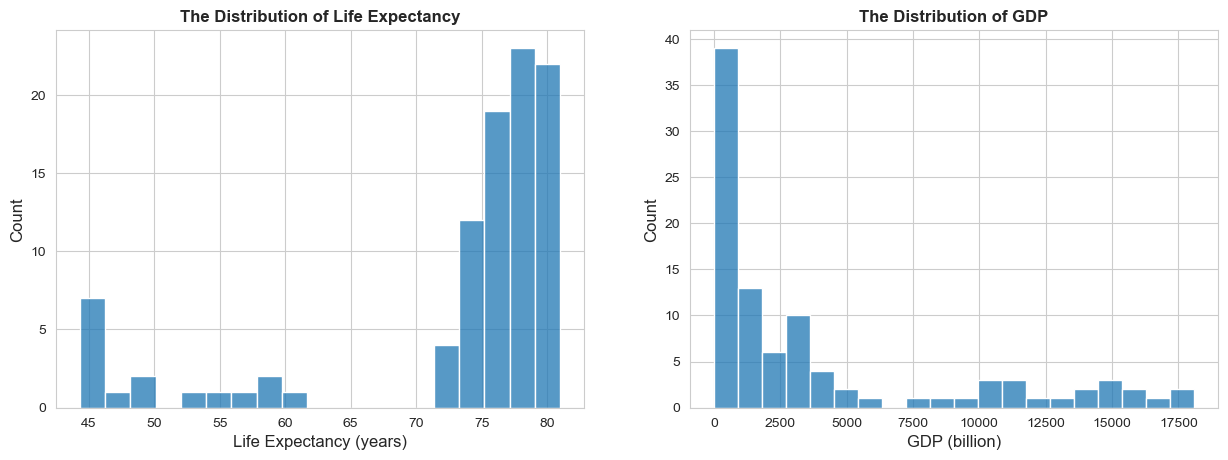

<Figure size 432x288 with 0 Axes>

In [5]:
## The overall distribution of Life Expectancy and GDP
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,5), dpi=100)
ax = sns.histplot(data=df.life_expect, ax=axs[0])
ax.set_title('The Distribution of Life Expectancy', weight='bold')
ax.set_xlabel('Life Expectancy (years)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
sns.histplot(data=df.gdp, ax=axs[1], bins=20)
plt.title('The Distribution of GDP', weight='bold')
plt.xlabel('GDP (billion)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
plt.clf()

As illustrated in the two histograms above, my earlier discovery that the two distrubutions are left skewed are confirmed. Looking at the distribution of life expectancy, we see that most data fall into the range between 70 and 80, which is refreshingly good to discover. On the other hand, most GDP data ranging from slightly above 4B to lower than 5 trillion dolalrs. 

Thus, I'd like to take a closer look to find out which countries fall into those ranges.

In [6]:
## Create two dataframes: one for countries with `life expectancy` lower than 65 and another for `GDP` lower than 5T dollars
life_65_df = df.loc[df.life_expect < 65]
gdp_5T_df = df.loc[df.gdp <= 5000]

print(life_65_df.country.unique())
print(gdp_5T_df.country.unique())

['Zimbabwe']
['Chile' 'China' 'Germany' 'Mexico' 'Zimbabwe']


Interestingly, the only country whose `life expectancy` lower than 65 is Zimbabwe. Also, four out of five countries in the dataset have the GDP lower than 5T dollars, which means that the US's economy is far bigger than the others. Now, we should take a closer look at how the five countries have progressed in terms of devoloping their economy.

### GDP Growth Analysis

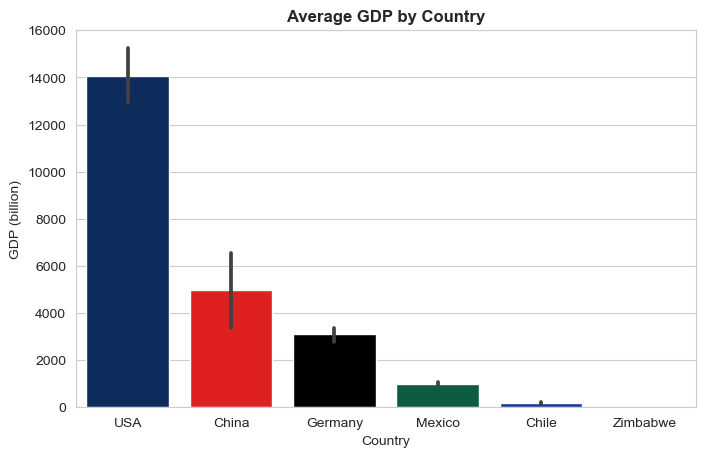

<Figure size 432x288 with 0 Axes>

In [61]:
## Create a color dictionary
color_set = {
    'USA':'#002868', 'China':'#FF0000', 'Germany':'#000000', 'Mexico':'#006847', 'Chile':'#0036a7', 'Zimbabwe':'#FFD200'
}

## Compare the GDPs
df_sorted = df.sort_values(by='gdp', ascending=False)
plt.figure(figsize=(8,5), dpi=100)
sns.barplot(x='country', y='gdp', data=df_sorted, palette=color_set, estimator=np.mean)
plt.title('Average GDP by Country', weight='bold')
plt.xlabel('Country')
plt.ylabel('GDP (billion)')
plt.show()
plt.clf()

As illustrated in the chart above, the US is undoubtedly the biggest economy, wheareas the Zimbabwean economy is the smallest. In comparison, the increase in the GDP of Zimbabwe and Chile seems too negligible. Since these countries have GDPs of different scales, we need to consider each country on its own GDP scale.

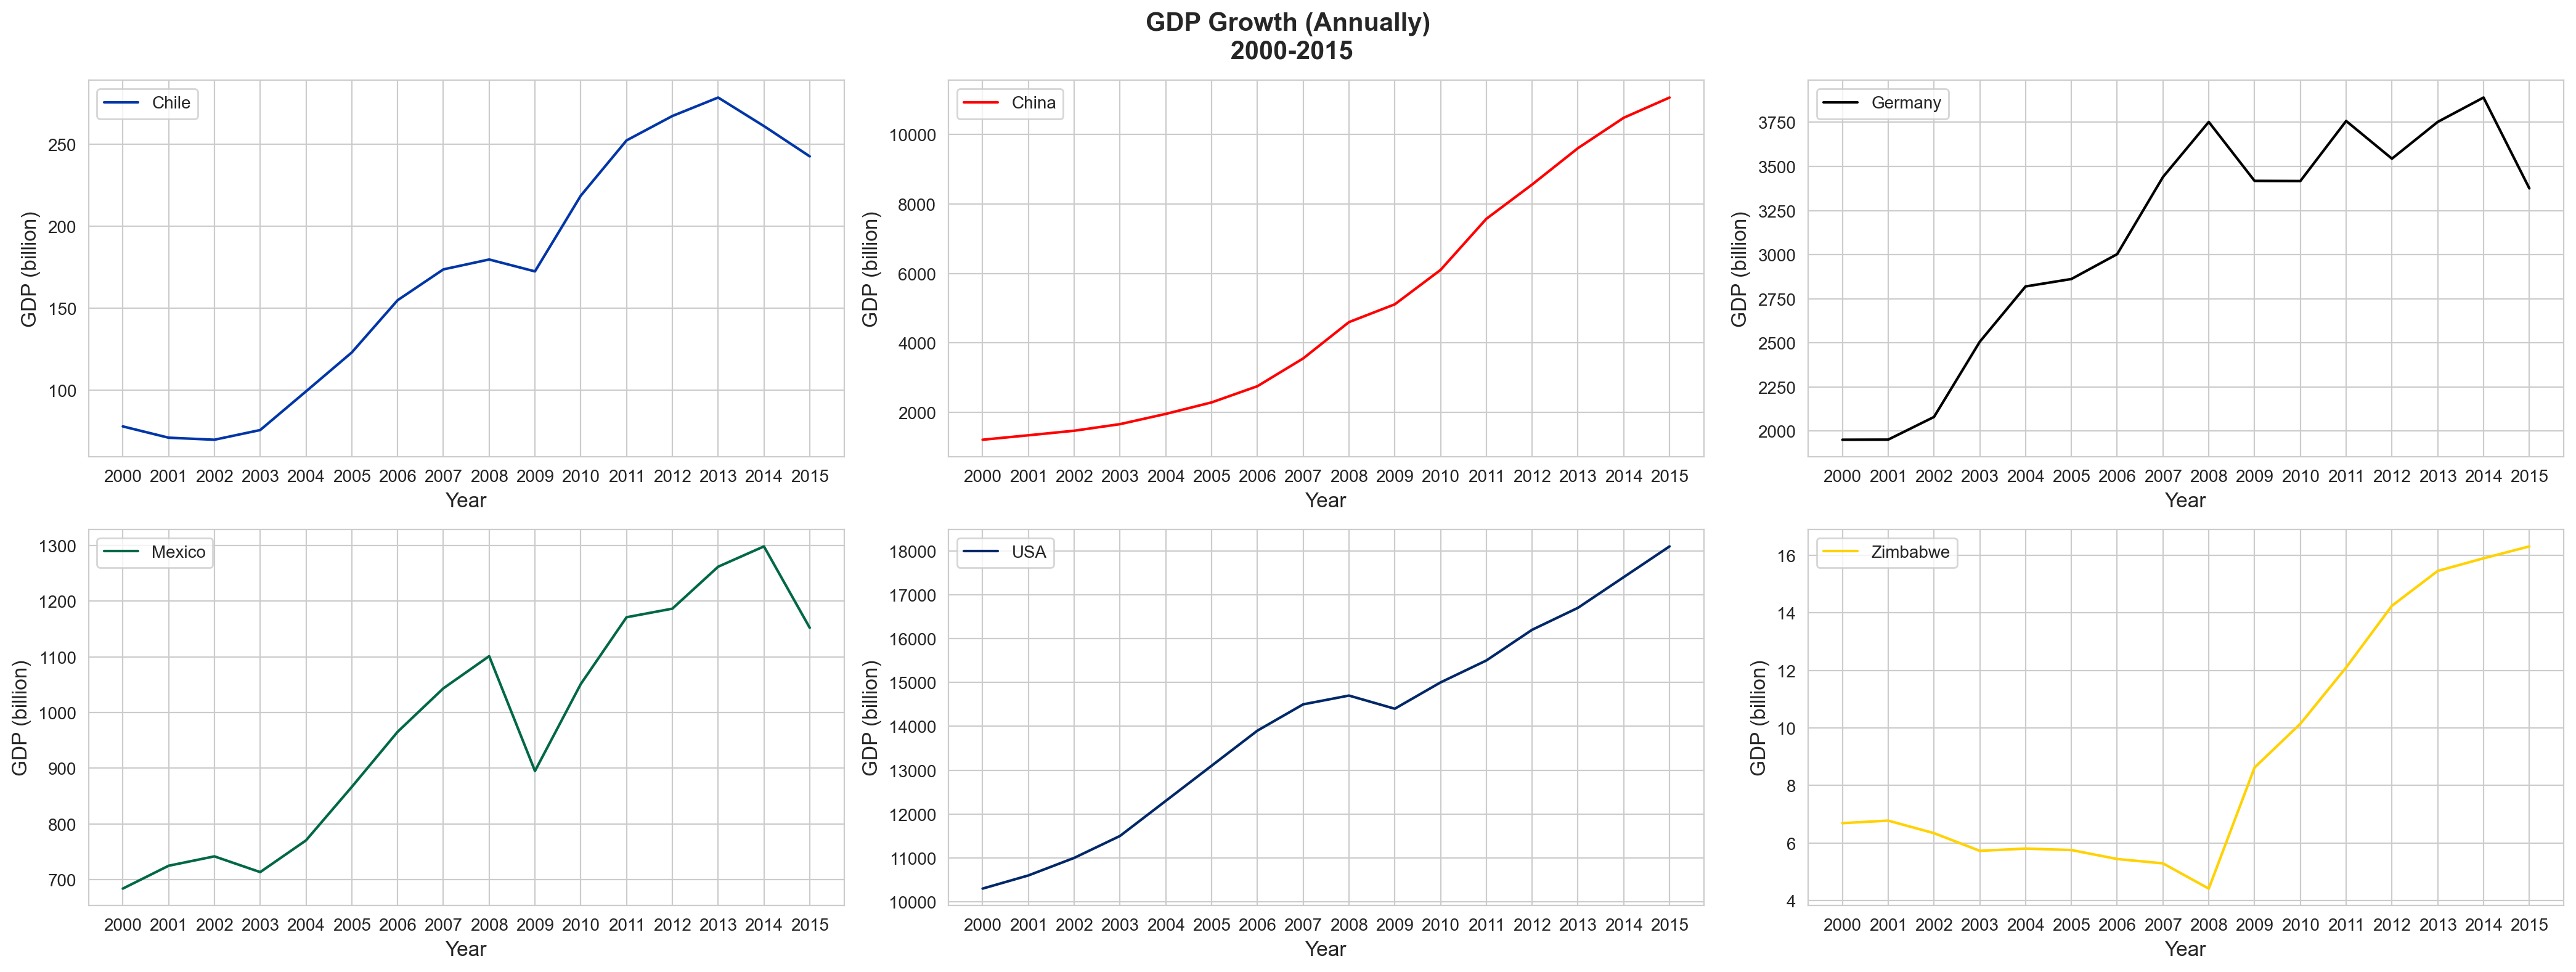

<Figure size 432x288 with 0 Axes>

In [53]:
## Plot a line graph to compare the countries' progress
plt.figure(figsize=(21,8), dpi=200)
i = 1
for country in df.country.unique():
    plt.subplot(2,3,i)
    sns.lineplot(x='year', y='gdp', data=df[df.country == country], color=color_set.get(country), label=country)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('GDP (billion)', fontsize=12)
    plt.xticks(range(2000, 2016))
    i += 1
plt.suptitle(t='GDP Growth (Annually)\n 2000-2015', weight='bold', size=15)
plt.tight_layout()
plt.show()
plt.clf()

Overall, During the 15-year period, the GDP of all six countries experienced an upward trend with China having enjoyed a financial miracle.

While the United States' GDP only increased by 8T dollars, China's GDP went up more than tenfold to approximately 11T dollars in 2015. Also, in 2008, Zimbabwe's economy witnessed a sharp increase when the GDP started to soar and by the end of 2015, the country's GDP had increased almost four times. 

The GDP of Germany peeked at around 3.7T dollars in 2008 and started to fluctate slightly and then experienced another downturn in 2015 where the GDP was a little bewlow 3.5T in 2015. 

### Life Expectancy Analysis

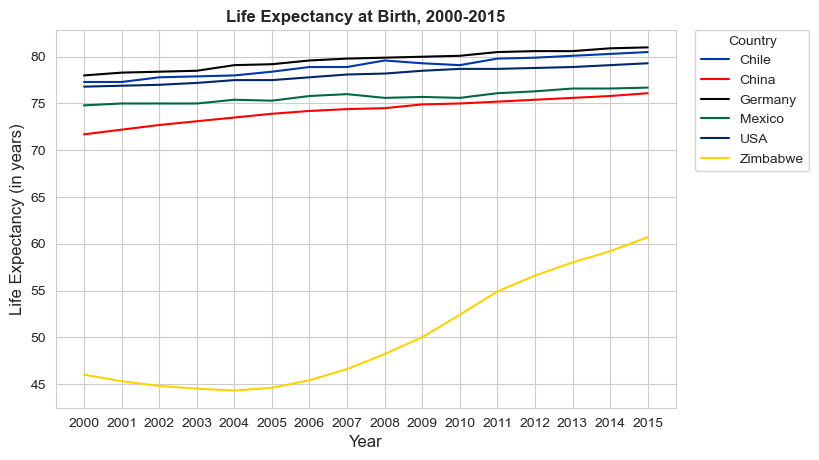

<Figure size 432x288 with 0 Axes>

In [36]:
## Plot a line graph to compare the countries' life expectancy at birth
plt.figure(figsize=(8,5), dpi=100)
sns.lineplot(x='year', y='life_expect', hue='country', data=df, palette=color_set)
plt.xticks(range(2000, 2016))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (in years)', fontsize=12)
plt.title('Life Expectancy at Birth, 2000-2015', weight='bold')
plt.legend(bbox_to_anchor=(1.02, 1.02), title='Country')
plt.show()
plt.clf()

Overall, all of six countries' average life expectancy increased during the 15-year period. 

In contrast to the significant difference in GDP, the gap in life expectancy between countries (excluding Zimbabwe) was relatively narrow. China has the lowest average life expectancy, which reached slightly above 75 years in 2017 after having gone up from around 72 years in 2000. Germany has the highest life expectancy, and followed by Chile, the USA and Mexico. Among the group, Mexico appears to have increased the slightest, only 1-2 years. 

The outlier in this data is Zimbabwe whose life expectancy is a little above 60 years. The gap between the country's and China's was approximately 15 years  in 2015 compared to around 27 years in 2000. The drastic positive change in the GDP could partly account for this narrowing the gap. In a further analysis, we should figure out what happened that caused a rapid change in the Zimbabwe's GDP at the time despite the ongoing global financial crisis.

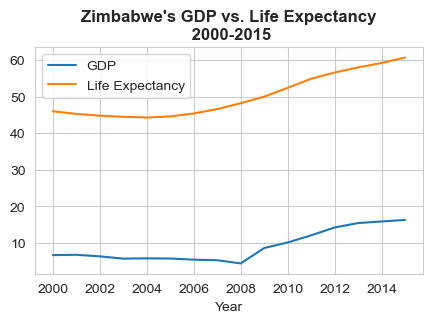

<Figure size 432x288 with 0 Axes>

In [54]:
## Plot a chart to visualize the presumed association between GDP growth and life expectancy increase in Zimbabwe
zimbabwe_df = df[df.country == 'Zimbabwe']

plt.figure(figsize=(5,3), dpi=100)
sns.lineplot(x='year', y='gdp', data=zimbabwe_df, label='GDP')
sns.lineplot(x='year', y='life_expect', data=zimbabwe_df, label='Life Expectancy')
plt.title('Zimbabwe\'s GDP vs. Life Expectancy\n 2000-2015', weight='bold')
plt.ylabel('')
plt.xlabel('Year')
plt.show()
plt.clf()

## Part 3: The association between GDP growth and life expectancy

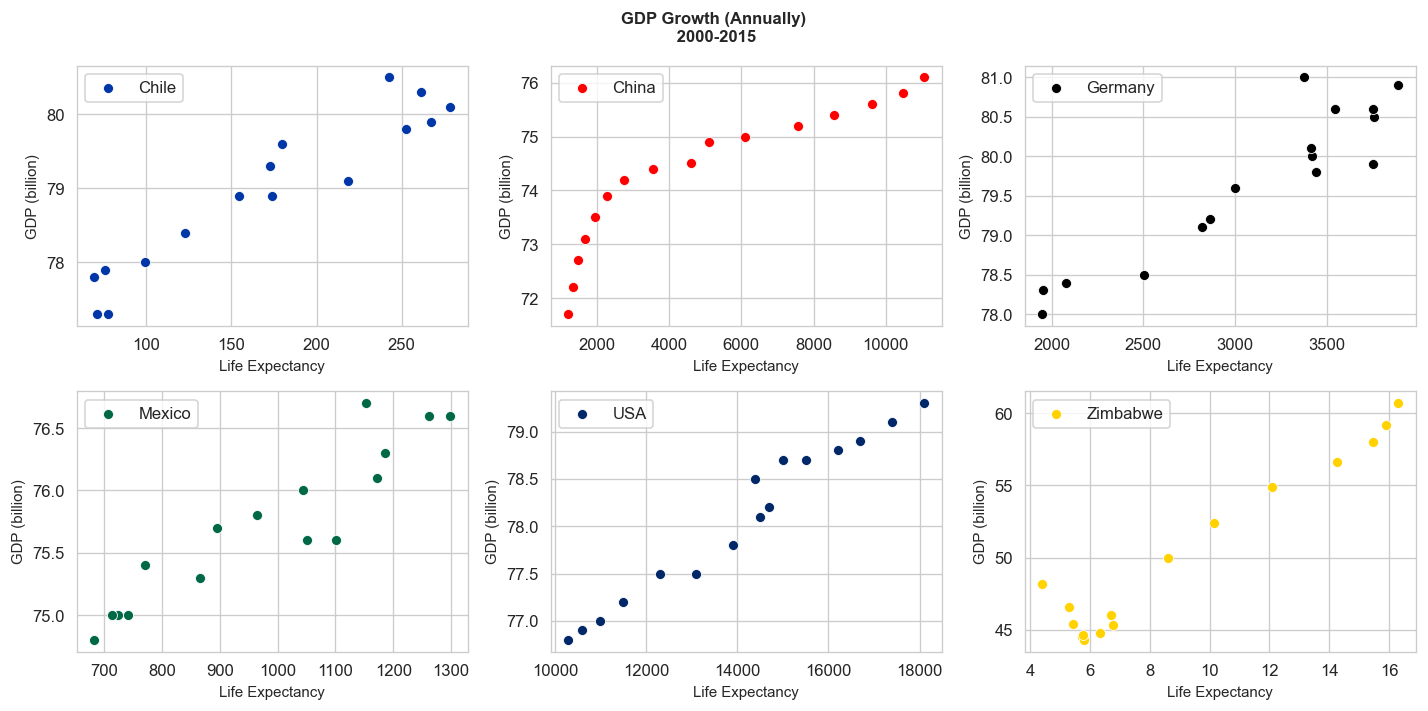

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(12,6), dpi=120)
i = 1
for country in df.country.unique():
    plt.subplot(2,3,i)
    sns.scatterplot(x='gdp', y='life_expect', data=df[df.country == country], color=color_set.get(country), label=country)
    plt.xlabel('Life Expectancy', fontsize=9)
    plt.ylabel('GDP (billion)', fontsize=9)
    i += 1
plt.suptitle(t='GDP Growth (Annually)\n 2000-2015', weight='bold', size=10)
plt.tight_layout()
plt.show()
plt.clf()

Looking at each of the charts, there seems to be a strong linear relationship between GDP and life expectancy. The higher the GDP, the higher life expectancy each country achieves. Yet, we should take a look at the scatter plot for all the data to have a better view.

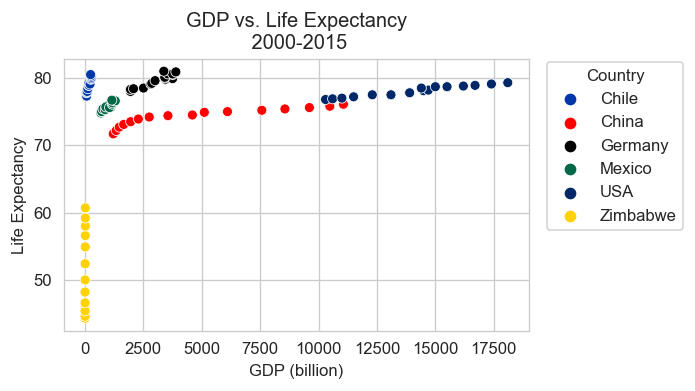

In [64]:
## Plot a scatter plot of GDP against life expectancy
plt.figure(figsize=(5,3), dpi=120)
sns.scatterplot(x='gdp', y='life_expect', hue='country', data=df, palette=color_set)
plt.title('GDP vs. Life Expectancy\n 2000-2015')
plt.xlabel('GDP (billion)')
plt.ylabel('Life Expectancy')
plt.legend(title='Country', bbox_to_anchor=(1.02, 1.02))
plt.show()

As illustrated on the scatter plot, we see that, except for Zimbabwe whose both low GDP and low life expectancy at birth, the other five countries have quite different GDPs ranging from the lowest of around 200B dollars to the highest of 18T dollars and yet their life expectancy at birth all falls in the range from 70 to over 80. 

More surprisingly, Chileans and Germans are likely to live longer than people living in the United States whose much higher GDP. 

Since the distributions of GDPs and life expectancy are not normal, to quantify the correlation between the two, I will use Kendall's Tau instead of Pearsonr. Kendall’s Tau is used to understand the strength of the relationship between two variables and is often used for correlation on continuous data if there are outliers in the data. 

**Tau correlation coefficient = 0:** There is no association between GDP and life expectancy.
**Tau correlation coefficient = 1:** There is a perfect association between GDP and life expectancy.

In [66]:
## Calculate Kendall's Tau correlation coefficient
tau_stats, p = kendalltau(df.gdp, df.life_expect)
print(tau_stats)

0.3704217229037674


The Tau correlation coefficient is approximately 0.37. This suggests a weak linear relationship between GDP and life expectancy. However, we should acknowledge that there would be more direct and indirect factors contributing to the change in life expectancy. This test can be proved wrong in a future analysis when there're more variables.

### Further analysis

Since the dataset here includes only six countries, which obviously do not represent the whole population as well as nations on Earth. Thus, it would be more prudent if we have a bigger dataset representative of a larger population.